# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнила студентка группы 9304 Селезнёва Анастасия, вариант 39

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения


### Бинарный метод
Бинарный метод возведения в степень - это один из методов, позволяющих быстро возвести любое число в степень $n \in N$. Показатель степени представляется в двоичной системе счисления, старший бит отбрасывается, а последующие заменяются согласно тому, что в случае '1' текущий результат умножается на самого себя и на $x$, а в случае '0' - текущий результат просто умножается на самого себя.
Количество умножений рассчитывается по формуле: $\lambda(n) + \nu(n) - 1$, где $\nu(n)$ - вес Хэмминга - количество ненулевых цифр в двоичной записи числа $n$, $\lambda(n) = \lfloor lb(n) \rfloor$.

### Метод множителей
Метод множителей - это один из методов, позволяющих быстро возвести любое число в степень $n \in N$. Показатель степени, если это число составное, предсталяется как произведение двух чисел $n = i \cdot j$, где $i$ - наименьший простой множитель $n$, а $j > 1$. Число возводится сначала в степень $i$, а после результат возводится в степень $j$, таким образом показатели степеней перемножаются и получается необходимая степень $n$. Если $n$ - простое число, то метод множителей рассматривается для числа $n - 1$, а полученный результат домножается на $x$.

### Определение аддитивной цепочки
Аддитивной цепочкой для $n \in N$ называется последовательность натуральных чисел $1 = a_0,a_1,a_2,...,a_m=n$, обладающих тем свойством, что $a_i=a_j+a_k$, $0 \leq k \leq j < i$, $\forall i=1...m$

$l(n) = m$ - наименьшая длина аддитивной цепочки.

Задача нахождения $l(n)$ является NP-C, однако можно дать некоторые оценки для длины минимальной аддитивной цепочки: бинарный метод дает следующую оценку: $l(n) \leq \lambda(n) + \nu(n) - 1$; метод множителей - $l(nm) \leq l(n) + l(m)$.

При $n \leq 1000$ справедлива следующая рекурентная формула для нахождения минимальной длины аддитивной цепочки: $l(n) = min\{l(n-1) + 1, l_n\} - \delta_n $, где

$l_p = \begin{cases}
\infty, &\text {$p$ - простое число,}\\
l(q)+l(p/q), &\text {если $q$ - минимальный простой делитель числа $p$;}
\end{cases}$

$\delta_n = \{0,1\}$.

### Теорема Брауэра
При некотором $k < lb(lb(n))$ справедливо $l(n) < (1+k^{-1})\cdot\lceil lb(n) \rceil + 2^{k-1} - k + 2$.

Если положить $k = \lambda(\lambda(n)) - 2\lambda(\lambda(\lambda(n)))$, то можно получить следующие следствия:

Следствие 1: $\lim\limits_{n\to \infty} \frac{l(n)}{\lambda(n)}=1$;

Следствие 2: Одна из наилучших верхних оценок для длины аддитивной цепочки: 
$\lambda(n) \cdot \left( 1+ \frac{1}{\lambda(\lambda(n))} + \frac{o(\lambda(\lambda(\lambda(n))))}{(\lambda(\lambda(n)))^2} \right)$.

### Алгоритм Брауэра
Суть алгоритма Брауэра заключается в вычислении $x^n$ за $lb(n) + \frac{(1+o(1))lb(n)}{lb(lb(n))}$ операций.

Цепочки Брауэра задаются рекурентной формулой:

$B_k(n) = \begin{cases}
1, 2, 3,..., 2^k-1, &\text {$n < 2^k $},\\
B_k(q), 2q, 4q,..., 2^kq, n, &\text {$n \geq 2^k$ и $q = \lfloor \frac{n}{2^k} \rfloor $}.
\end{cases}$

Число $n$ представляется в системе счисления по основанию $2^k$.

### Звёздная цепочка. Гипотеза Шольца-Брауэра
Звёздная цепочка - это аддитивная цепочка, в которой каждый элемент получен при помощи сложения предыдущего и какого-то еще, то есть: $a_i=a_{i-1}+a_k$, где $0 \leq k \leq i-1$.

$l^*(n)=m$ - длина минимальной звёздной цепочки. $l^*(n) \geq l(n)$.

Гипотеза Шольца-Брауэра заключается в следующем: $l^*(2^n-1) \geq l^*(n) + n - 1$.

### Алгоритм дробления вектора индексов
Алгоритм дробления индексов находит минимальную звёздную цепочку для числа $n$.

Для любой звёздной цепочки можно задать вектор индексов. Вектором индексов аддитивной цепочки называется последовательность $\{r_i\}^m_{i=1}$, где $r_i=\{x : 1 \leq x \leq i \}$.

Каждый вектор индексов может быть разбит на два: $\{r_i\}^q_{i=1}$ - фиксированный вектор и $\{\rho_j\}^m_{j=q+1}$ - меняющийся вектор, где $\rho_j=\{x: 1 \leq x \leq j \}$. Наибольшее значение $a_m = a_{max}$ будет достигаться для следующего вектора: $\{r_i\}^q_{i=1} \cup \{q+1, q+2,...,m\}, \Rightarrow a_{max} = a_{q+1} \cdot 2^{m-q}$. Наименьшее значение $a_m=a_{min}$ будет достигаться для вектора $\{r_i\}^q_{i=1} \cup \{1,1,...,1\}, \Rightarrow a_{min} = a_{q+1}+m-q$.

Алгоритм перебора заключается в следующем: текущий вектор индексов разбивается на фиксированный и меняющийся. Строится звёздная цепочка для всего вектора индексов и вычисляются значения $a_{min}$ и $a_{max}$. Если:
1. $a_m=n$, то решение найдено;
2. $n \notin [a_{min}, a_{max}]$, то осуществляется переход к следующему набору фиксированного вектора;
3. $n \in [a_{min}, a_{max}]$, то осуществляется перебор всех меняющихся векторов. 

Если для заданной длины не нашлось аддитивной цепочки, то длина аддитивной цепочки увеличивается. Длина аддитивной цепочки $m \in [\underline{l}(n), \overline{l}(n)]$, где $\underline{l}(n) = \lceil lb(n) \rceil, \overline{l}(n) = \lambda(n)+\nu(n)-1$.

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

**Порядок выполнения работы:**
1. Применить бинарный метод и метод множителей для $ x^n $, где $n⩾30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов. Сделать выводы.

## Выполнение работы

### Бинарный метод и метод множителей
Применим бинарный метод и метод множителей для $x^{33}, x^{52}, x^{63}$.

*Бинарный метод для $x^{33}$:*

Представим показатель степени в двоичном виде: $33_{10}=100001_2$. Старший бит отбрасывается, а последующие заменяются согласно тому, что в случае '1' текущий результат умножается на самого себя и на $x$, а в случае '0' - текущий результат просто умножается на самого себя.

$x, x \cdot x = x^2, x^2 \cdot x^2 = x^4, x^4 \cdot x^4 = x^8, x^8 \cdot x^8 = x^{16}, x^{16} \cdot x^{16} = x^{32}, x^{32} \cdot x = x^{33}.$

Количество операций: 6.

*Метод множителей для $x^{33}$:*

Наименьший простой множитель числа $33 - 3$, поэтому представим число $33$ как $33 = 3 \cdot 11$.

$x, x \cdot x = x^2, x^2 \cdot x = x^3; x^3 = y;$

$ y \cdot y = y^2, y^2 \cdot y^2 = y^4, y^4 \cdot y = y^5, y^5 \cdot y^5 = y^{10}, y^{10} \cdot y = y^{11}$.

Количество операций: 7. Таким образом, БМ быстрее ММ на 1 операцию,.

*Бинарный метод для $x^{52}$:*

Представим показатель степени в двоичном виде: $52_{10}=110100_2$. 

$x, x \cdot x = x^2, x^2 \cdot x = x^3, x^3 \cdot x^3 = x^6, x^6 \cdot x^6 = x^{12}, x^{12} \cdot x = x^{13}, x^{13} \cdot x^{13} = x^{26}, x^{26} \cdot x^{26} = x^{52}$.

Количество операций: 7.

*Метод множителей для $x^{52}$:*

Наименьший простой множитель числа $52 - 2$, поэтому представим число $52$ как $52 = 2 \cdot 26$.

$x, x \cdot x = x^2; x^2 = y;$

$ y \cdot y = y^2, y^2 \cdot y = y^3, y^3 \cdot y^3 = y^6, y^6 \cdot y^6 = y^{12}, y^{12} \cdot y = y^{13}, y^{13} \cdot y^{13} = y^{26} $.

Количество операций: 7. Таким образом, количество операций в БМ и ММ совпадает.

*Бинарный метод для $x^{63}$:*

Представим показатель степени в двоичном виде: $63_{10}=111111_2$. 

$x, x \cdot x = x^2, x^2 \cdot x = x^3, x^3 \cdot x^3 = x^6, x^6 \cdot x = x^7, x^7 \cdot x^7 = x^{14}, x^{14} \cdot x = x^{15}, x^{15} \cdot x^{15} = x^{30}, x^{30} \cdot x = x^{31}, x^{31} \cdot x^{31} = x^{62}, x^{62} \cdot x = x^{63}$.

Количество операций: 10.

*Метод множителей для $x^{63}$:*

Наименьший простой множитель числа $63 - 3$, поэтому представим число $63$ как $63 = 3 \cdot 21$.

$x, x \cdot x = x^2, x^2 \cdot x = x^3; x^3 = y;$

$ y \cdot y = y^2, y^2 \cdot y^2 = y^4, y^4 \cdot y = y^5, y^5 \cdot y^5 = y^{10}, y^{10} \cdot y^{10} = y^{20}, y^{20} \cdot y = y^{21} $.

Количество операций: 8. Таким образом, ММ быстрее БМ на 2 операции.

**Результаты возведения в степень:**


| n | Количество операций БМ | Количество операций ММ |
| -----|:---------------------:|:------------------------:|
| 33 | 6 | 7 |
| 52 | 7 | 7 |
| 63 | 10 | 8 |

**Вывод:**

При степенях $n = 2^k - 1$, где $k \in N$, метод множителей работает быстрее, чем бинарный метод (например, при $n=63$), а при степенях $n = 2^k + 1$, где $k \in N$, наоборот (например, при $n=33$). В большинстве других случаев бинарный метод и метод множителей дают одинаковое количество операций, либо метод множителей оказывается незначительно быстрее.  

### Алгоритм Брауэра
Реализован алгоритм Брауэра для вычисления приближенных аддитивных цепочек для различных чисел при варьировании параметра $k$:

In [53]:
def brouwer(n, k):
      d = 2 ** k
      sequence = []
      if n >= d:
          q = n
          seq_ri = []
          while q >= d:
              r = q % d
              seq_ri.append(r)
              q = q // d
          seq_ri.append(q)
          seq_ri.reverse()
          z = 1
          while z < (max(seq_ri)+1):
              sequence.append(z)
              z += 1
          q = seq_ri[0]
          i = 0
          while i < (len(seq_ri) - 1):
              j = 0
              while j < k:
                  q *= 2
                  sequence.append(q)
                  j += 1
              if seq_ri[i+1] > 0:
                  q += seq_ri[i+1]
                  sequence.append(q)
              i += 1
      else:
          i = 0
          while i < n:
              sequence.append(i + 1)
              i += 1
      return sequence, (len(sequence))

n = int(input("Введите n: "))
k = int(input("Введите k: "))
v = []
l = 0
v, l = brouwer(n, k)
print("Аддитивная цепочка: ", v)
print("Длина аддитивной цепочки: ", l)

Введите n: 590
Введите k: 3
Аддитивная цепочка:  [1, 2, 3, 4, 5, 6, 2, 4, 8, 9, 18, 36, 72, 73, 146, 292, 584, 590]
Длина аддитивной цепочки:  18


Алгоритм был применен к следующим числам: $88, 95, 100, 127, 257$.

Таблица с минимальными аддитивными цепочками и их длинами:

| n | Минимальная длина| Минимальная аддитивная цепочка |
| -----|:---------------------:|:------------------------:|
| 88 | 9 | [1, 2, 4, 5, 10, 11, 22, 44, 88] |
| 95 | 10 | [1, 2, 3, 5, 10, 20, 23, 46, 92, 95] |
| 100 | 9 | [1, 2, 3, 6, 12, 24, 25, 50, 100] |
| 127 | 11 | [1, 2, 3, 6, 12, 15, 30, 60, 63, 126, 127] |
| 257 | 10 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 257] |

Результаты алгоритма Брауэра при разных $k$ для $n=88$: 

| k | Длина| Аддитивная цепочка |
| --|:----:|:------------------------:|
| 2 | 10 | [1, 2, 2, 4, 5, 10, 20, 22, 44, 88] |
| 3 | 10 | [1, 2, 3, 2, 4, 8, 11, 22, 44, 88] |
| 4 | 13 | [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 40, 80, 88] |

Результаты алгоритма Брауэра при разных $k$ для $n=95$: 

| k | Длина| Аддитивная цепочка |
| --|:----:|:------------------------:|
| 2 | 12 | [1, 2, 3, 2, 4, 5, 10, 20, 23, 46, 92, 95]|
| 3 | 15 | [1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 11, 22, 44, 88, 95]|
| 4 | 20 | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 10, 20, 40, 80, 95]|

Результаты алгоритма Брауэра при разных $k$ для $n=100$: 

| k | Длина| Аддитивная цепочка |
| --|:----:|:------------------------:|
| 2 | 10 | [1, 2, 2, 4, 6, 12, 24, 25, 50, 100]|
| 3 | 12 | [1, 2, 3, 4, 2, 4, 8, 12, 24, 48, 96, 100]|
| 4 | 11 | [1, 2, 3, 4, 5, 6, 12, 24, 48, 96, 100]|
| 5 | 10 | [1, 2, 3, 4, 6, 12, 24, 48, 96, 100]|
| 6 | 43 | |

Результаты алгоритма Брауэра при разных $k$ для $n=127$: 

| k | Длина| Аддитивная цепочка |
| --|:----:|:------------------------:|
| 2 | 12 | [1, 2, 3, 2, 4, 7, 14, 28, 31, 62, 124, 127]|
| 3 | 15 | [1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 15, 30, 60, 120, 127]|
| 4 | 20 | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 14, 28, 56, 112, 127]|

Результаты алгоритма Брауэра при разных $k$ для $n=257$: 

| k | Длина| Аддитивная цепочка |
| --|:----:|:------------------------:|
| 2 | 10 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 257]|
| 3 | 11 | [1, 2, 3, 4, 8, 16, 32, 64, 128, 256, 257]|
| 4 | 10 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 257]|
| 5 | 14 | [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 256, 257]|
| ... | ... | ... |
| 9 | 257 | |

**Вывод:**

Из полученных результатов можно сделать вывод, что как таковой зависимости между $k$ и длиной аддитивной цепочки нет, однако, начиная с некоторого $k$, длина полученной аддитивной цепочки становится намного больше минимальной. Например, это показано в таблицах для $n = 100$ и $n = 257$.

Также можно еще раз убедиться, что алгоритм Брауэра действительно является приблизительным, так как для некоторых значений он находит цепочку, лишь близкую к минимальной (например, $n = 88$ и $n = 95$).

### Алгоритм дробления вектора индексов
Реализован алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для числа $n$. Данный алгоритм является точным.

In [2]:
import math
import time
def Alghorithm_spliting_the_index_vec(n):
    m = int(math.log(n, 2))
    top_border_len = (int(math.log(n, 2)) + bin(n).count('1') - 1)
    while (m <= top_border_len):
        q = m // 2
        if (q == 0):
            q = 1
        left_r_vec = [i for i in range(1, q + 1)]
        while (len(left_r_vec) == q):
            right_r_vec =[q + i for i in range(1, (m - q + 1))]
            additive_chain = creating_star_chain(left_r_vec, right_r_vec)
            a_max = additive_chain[q] * (2**(m - q))
            a_min = additive_chain[q] + m - q
            if (n == additive_chain[-1]):
                return additive_chain
            if (n == a_max):
                return creating_star_chain(left_r_vec, right_r_vec)
            if (n == a_min):
                right_r_vec = [1 for i in range(m - q)]
                return creating_star_chain(left_r_vec, right_r_vec)
            if (n > a_min) and (n < a_max):
                while (right_r_vec[0] != 0):
                    additive_chain = creating_star_chain(left_r_vec, right_r_vec)
                    if (additive_chain[-1] == n):
                        return additive_chain
                    iter_or_dec_index_vector(right_r_vec, q + 1, False)
            iter_or_dec_index_vector(left_r_vec, 1, True)
        m += 1

def creating_star_chain(left_r_vec, right_r_vec):
    additive_chain = [1]
    for i in left_r_vec:
        additive_chain.append(additive_chain[-1] + additive_chain[i - 1])
    for i in right_r_vec:
        additive_chain.append(additive_chain[-1] + additive_chain[i - 1])
    return additive_chain
def iter_or_dec_index_vector(vec, index, is_left):
    max_index = index + len(vec) - 1
    for i in range(1, len(vec) + 1):
        vec[-i] -= 1
        if vec[-i] == 0:
            if i == len(vec):
                if (is_left):
                    vec.pop()
                    for j in range(len(vec)):
                        vec[j] = j + index
                break
            vec[-i] = max_index
            max_index -= 1
        else:
            break

n = int(input("Введите n: "))
start = time.time()
star_chain = Alghorithm_spliting_the_index_vec(n)
end = time.time()
print("Звездная цепочка:", star_chain)
print("Длина звездной цепочки:", len(star_chain))
print("Время работы:", end - start, ",c")

Введите n: 23
Звездная цепочка: [1, 2, 4, 5, 9, 18, 23]
Длина звездной цепочки: 7
Время работы: 0.001138448715209961 ,c


Результаты работы алгоритма дробления индексов для $n = 590, 666, 825$ представлены в таблице:

| n | Длина цепочки | Цепочка | Время поиска, с |
| --|:-------------:|:--------:|:-----------------:|
| 590 | 13 | [1, 2, 4, 8, 16, 32, 64, 128, 192, 196, 392, 588, 590]| 182.145 |
| 666 | 13 | [1, 2, 4, 8, 16, 32, 64, 128, 136, 264, 528, 664, 666]| 202.52 |
| 825 | 13 | [1, 2, 4, 8, 16, 32, 48, 49, 97, 194, 388, 776, 825]| 145.97 |

В таблице представлено сравнение длин цепочек, полученных различными методами и алгоритмами:

| n | Алгоритм дробления индексов | Алгоритм Брауэра | Бинарный метод | Метод множителей |
| --|:---------------------------:|:----------------:|:--------------:|:----------------:|
| 590 | 13 | 14 | 13 | 13 |
| 666 | 13 | 14 | 13 | 14 |
| 825 | 13 | 14 | 14 | 13 |

**Вывод:**

Исходя из результатов, представленных в первой таблице, можно сделать вывод, что алгоритм дробления индексов находит верную аддитивную цепочку минимальной длины, однако вычисления могут занять некоторое время, если $n>500$. Если сравнивать длины цепочек, которые были получены различными методами, то можно заметить, что хуже всего отработал алгоритм Брауэра. 

### Проверка первого следствия теоремы Брауэра


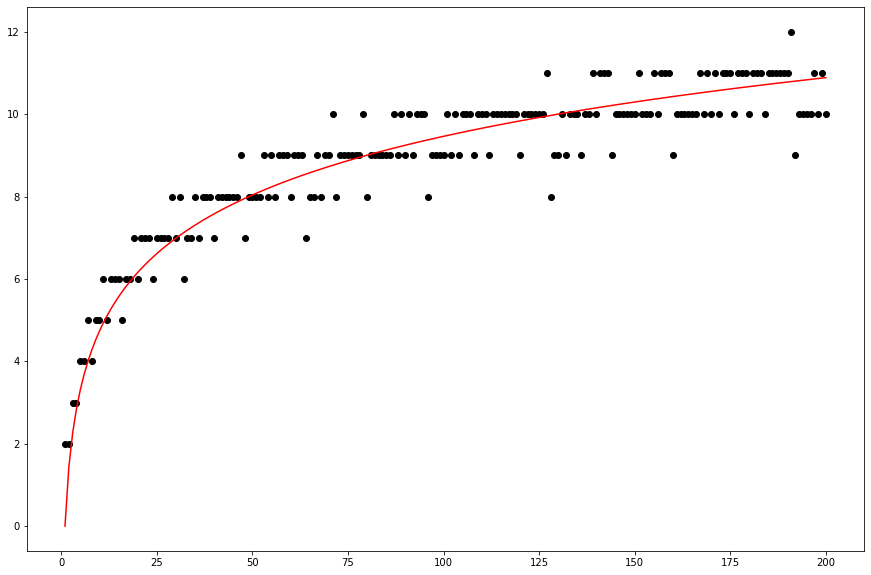

In [3]:
import matplotlib.pyplot 
import numpy 
from scipy.optimize import leastsq

x = []
y = []
matplotlib.pyplot.figure(figsize = (15, 10))
for i in range(1, 201):
    x.append(i)
    y.append(len(Alghorithm_spliting_the_index_vec(i)))
func = lambda k, y, x: y - numpy.log(x) * k[0]
arr = leastsq(func, 1, args = (y, x))
matplotlib.pyplot.plot(x, y, 'ko',  x, numpy.log(x) * arr[0], 'r')
matplotlib.pyplot.show()

**Вывод:**

На графике видно, что множество $l(n)$, где $n=1...200$ аппроксимируется логарифмической кривой, что подтверждает первое следствие теоремы Брауэра: $\lim\limits_{n\to \infty} \frac{l(n)}{\lambda(n)}=1$, то есть $l(n)$ и $\lambda(n)$ эквивалентны на бесконечности. Это означает, что с увеличением $n$ длина минимальной аддитивной цепочки будет увеличиваться как логарифмическая функция. 

### Проверка гипотезы Шольца–Брауэра
Была проверена гипотеза Шольца-Брауэра для $1 < n \leq 10$ на алгоритме дробления вектора индексов: 

In [4]:
for i in range(2,11):
    str1 = "n=" +str(i) + " "
    left = len(Alghorithm_spliting_the_index_vec((2**i) -1))
    str1 += str(left) + " <= "
    right = (len(Alghorithm_spliting_the_index_vec(i)) + i -1)
    str1 += str(right)
    print(str1)

n=2 3 <= 3
n=3 5 <= 5
n=4 6 <= 6
n=5 8 <= 8
n=6 9 <= 9
n=7 11 <= 11
n=8 11 <= 11
n=9 13 <= 13
n=10 14 <= 14


В таблице приведены значения $l^*(2^n-1)$ и $l^*(n) + n - 1$ для $n \in (1, 10]$:

| $n$ | $l^*(2^n-1)$| $l^*(n) + n - 1$ |
| --|:----:|:------------------------:|
| 2 | 3 | 3 |
| 3 | 5 | 5 |
| 4 | 6 | 6 |
| 5 | 8 | 8 |
| 6 | 9 | 9 |
| 7 | 11 | 11 |
| 8 | 11 | 11 |
| 9 | 13 | 13 |
| 10 | 14 | 14 |

На основе полученных данных можно сделать вывод, что для $1 < n \leq 10$ гипотеза Шольца-Брауэра справедлива. 

## Вывод по практической работе
В ходе выполнения практической работы были изучены и реализованы следующие алгоритмы для нахождения аддитивных цепочек для заданного числа $n$:
- Бинарный метод;
- Метод множителей;
- Алгоритм Брауэра;
- Алгоритм дробления вектора индексов.

Также были проверены первое следствие теоремы Брауэра и гипотеза Шольца-Брауэра для $1 < n \leq 10$.

Было выяснено, что в общем случае бинарный метод и метод множителей дают одинаковое количество операций, либо метод множителей оказывается незначительно быстрее; однако при степенях $n=2^k+1$, где $k \in N$, бинарный метод показывает себя лучше. Алгоритм Брауэра быстро вычисляет аддитивную цепочку, но она не всегда является минимальной. Алгоритм дробления вектора индексов находит аддитивную цепочку минимальной длины, но так как это переборная задача, вычисления могут занять достаточно времени. 

